In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train = pd.read_csv('train.csv')

print(f'{train.shape}\n')
train.head()

(42000, 785)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv('test.csv')

print(f'{test.shape}\n')
test.head()

(28000, 784)



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from collections import Counter

a = [1, 1, 2 ,1 ,1 , 2, 1]

print(Counter(a))

Counter({1: 5, 2: 2})


In [8]:
print("Total values for each digit:\n")
Counter(train["label"])

Total values for each digit:



Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

<AxesSubplot:xlabel='label', ylabel='count'>

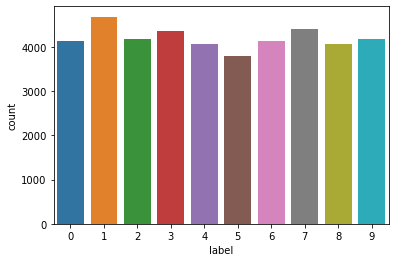

In [9]:
sns.countplot(data=train, x='label')

In [10]:
print(f'Null values (training data): {train.isnull().sum().sum()}\n')
print(f'Null values (testing data): {test.isnull().sum().sum()}')

Null values (training data): 0

Null values (testing data): 0


In [11]:
x_train = train.values[:, 1:] 
y_train = train.values[:, 0] 

x_test = test.values[:, 0:]

del train 
del test 

In [13]:
mean = np.mean(x_train) 
std = np.std(x_train)   
x_train = (x_train-mean)/(std+1e-7)    
x_test = (x_test-mean)/(std+1e-7)

x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

y_train

array([1, 0, 1, ..., 7, 6, 9])

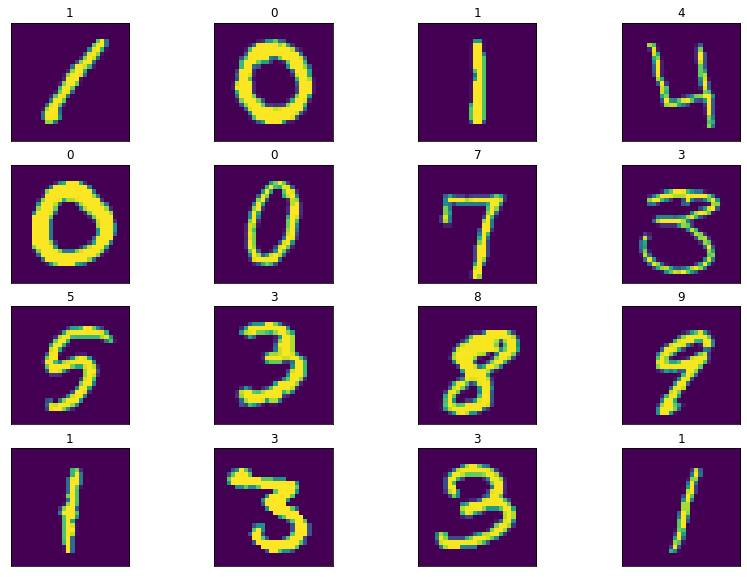

In [14]:
fig = plt.figure(figsize=[14, 10])

for i in range(16):
    ax = fig.add_subplot(4 , 4, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28,28)))
    ax.set_title(str(y_train[i]))

In [15]:
mean = np.mean(x_train) # take the mean
std = np.std(x_train)   # take the standard deviation
x_train = (x_train-mean)/(std+1e-7)    # normalizing the values
x_test = (x_test-mean)/(std+1e-7)

x_train = x_train.reshape(-1, 28, 28, 1) # reshaping them
x_test = x_test.reshape(-1, 28, 28, 1)

y_train

array([1, 0, 1, ..., 7, 6, 9])

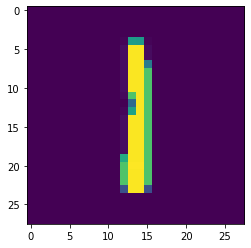

In [16]:
plt.imshow(x_train[2])

In [17]:
num_classes = 10

y_train = to_categorical(y_train, num_classes=num_classes)

x_train, x_val = x_train[:37000], x_train[37000:]
y_train, y_val = y_train[:37000], y_train[37000:]

print(f'Training samples: {x_train.shape}\nValidation samples: {x_val.shape}\nTesting samples: {x_test.shape}')

Training samples: (37000, 28, 28, 1)
Validation samples: (5000, 28, 28, 1)
Testing samples: (28000, 28, 28, 1)


In [18]:
nets = 4  # change here the amount of CNN ensembles
model = [0] * nets

for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))
    
    model[j].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    
model[0].summary() # summary of one of the models

2022-05-17 13:20:38.301209: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-17 13:20:38.301440: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)       

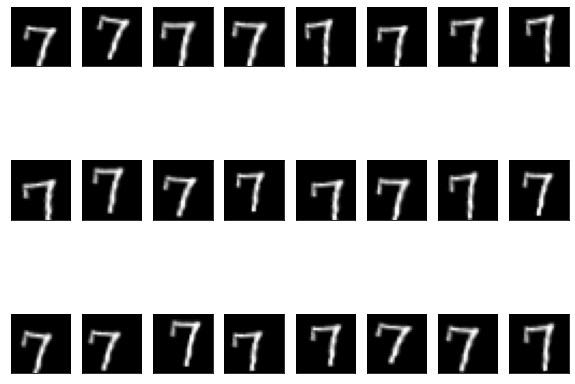

In [19]:
datagen = ImageDataGenerator(
                rotation_range=10,  
                zoom_range = 0.10,  
                width_shift_range=0.1, 
                height_shift_range=0.1
)

aug = datagen.flow(x_train[6].reshape(-1, 28, 28, 1))

fig = plt.figure(figsize=[10, 8])
for i in range(24):
    
    ax = fig.add_subplot(3, 8, i+1, xticks=[], yticks=[])
    aug_img = next(aug)[0]
    ax.imshow(aug_img, cmap = 'gray')
    
plt.show()

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

hist = [0] * nets
epochs = 20
batch_size = 64

for j in range(nets):
    hist[j] = model[j].fit(
        datagen.flow(x_train, y_train, batch_size=batch_size), 
        epochs = epochs,
        steps_per_epoch=x_train.shape[0] // batch_size,
        validation_data = (x_val, y_val),
        callbacks = [annealer],
        verbose = 1)
    
    print(f'CNN {j+1}: Epochs = {epochs}, Training accuracy = {max(hist[j].history["accuracy"])}, Val accuracy = {max(hist[j].history["val_accuracy"])}')
    print()

Epoch 1/20
578/578 [==============================] - 231s 400ms/step - loss: 0.4818 - accuracy: 0.8499 - val_loss: 0.0831 - val_accuracy: 0.9742
Epoch 2/20
578/578 [==============================] - 221s 383ms/step - loss: 0.1397 - accuracy: 0.9580 - val_loss: 0.0714 - val_accuracy: 0.9812
Epoch 3/20
578/578 [==============================] - 215s 372ms/step - loss: 0.0994 - accuracy: 0.9699 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 4/20
578/578 [==============================] - 1444s 2s/step - loss: 0.0840 - accuracy: 0.9748 - val_loss: 0.0414 - val_accuracy: 0.9886
Epoch 5/20
578/578 [==============================] - 219s 379ms/step - loss: 0.0716 - accuracy: 0.9779 - val_loss: 0.0255 - val_accuracy: 0.9906
Epoch 6/20
578/578 [==============================] - 219s 379ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 7/20
578/578 [==============================] - 226s 390ms/step - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.0353 - v